# Tarea 2

**Envío del PR inicial: 07.09.2018**

**Aceptación del PR: 14.09.2018**

## 1

Extiendan los operadores `+`, `-`, `*` y `/` para que funcionen cuando una de las dos entradas es un `Dual` y la otra es un `Real` (número cualquiera), sin importar el orden.

In [2]:
"""
    Dual

Definición de los números duales. Los campos internos son
    x   :: Float64      # Valor de la función
    x'  :: Float64      # Valor de su derivada

"""
struct Dual
    x  :: Float64
    x´ :: Float64
end

Dual(c::Real) = Dual(c,0.0)

dual(x0::Real)=Dual(x0,1.0)


#Importamos la definición de los siguientes operadores
import Base:+,-,*,/,^

+(u::Dual,v::Dual)=Dual(u.x+v.x,u.x´+v.x´)

-(u::Dual,v::Dual)=Dual(u.x-v.x, u.x´-v.x´)

*(u::Dual,v::Dual)=Dual( u.x * v.x, u.x´*v.x + u.x*v.x´)

function /(u::Dual , v::Dual)
    y = u.x / v.x
    Dual(y, (u.x´ - y * v.x´)/v.x)
end

function ^(a::Dual , n::Int)
    y = a.x^(n-1)
    Dual(a.x * y , n*y*a.x´)
end

^ (generic function with 63 methods)

In [2]:
#Extenderemos la operación +
+(a::Real, u::Dual) = Dual(a + u.x, u.x´)
+(u::Dual,a::Real) = Dual(a+u.x,u.x´)

#Extenderemos la operación -
-(a::Real,u::Dual) = Dual(a - u.x, -u.x´)
-(u::Dual,a::Real) = Dual(u.x - a, u.x´)

#Extenderemos la operación *
*(a::Real, u::Dual) = Dual(a*u.x , a*u.x´)
*(u::Dual, a::Real) = Dual(a*u.x , a*u.x´)

#Extenderemos la operación /
function /(a::Real,u::Dual)
    Dual(a/u.x , -a*u.x´/u.x^2)
end

/(u::Dual, a::Real) = u*a^(-1)

/ (generic function with 107 methods)

## 2

Construyan 2 tests para cada una de las operaciones aritméticas definidas para los `Dual`es, incluyendo las que definieron en el ejercicio 1.

In [3]:
import Test.@test   

#Funciona para cuando tnemos más de dos elementos: u + v + w = (u + v) + w

In [4]:
#Tests para operación +
@test Dual(1,1) + pi + Dual(-1,-1) == Dual(pi,0)
@test 1 + Dual(2,2) + Dual(1,1) == Dual(4,3) 

Test Passed

In [5]:
#Tests para operación -
@test Dual(1,1) - pi - Dual(-1,-1) == Dual(2-pi,2)
@test 1 - Dual(2,2) - Dual(1,1) == Dual(-2,-3) 

Test Passed

In [6]:
#Tests para operación *
@test Dual(1,3)*5*Dual(-1,1) == Dual(-5,-10) && 5*Dual(1,3)*Dual(-1,1) == Dual(-5,-10)

Test Passed

In [7]:
#Tests para operación /
@test Dual(2,1)/0.5/Dual(4,2) == Dual(1,0)

@test 4/Dual(2,1)/Dual(2,1) == Dual(1,-1)

Test Passed

In [8]:
#Tests para la operación ^
@test Dual(2.5,3)^3 == Dual(2.5^3,9*6.25) 
@test Dual(25,16)^1 == Dual(25, 16) 

Test Passed

In [9]:
#Test passed, pero hay un error durante el testing, es mejor en líneas separadas
@test Dual(2.5,3)^3 == Dual(2.5^3,9*6.25) && Dual(25,16)^1 == Dual(25,16) 

Test Passed

## 3

Sobrecarguen la función `show` (que está en Base) para que cuando se impriman los duales aparezcan con la notación $\varepsilon$ que usamos al principio de este notebook, por ejemplo, el resultado de `Dual(1,2)` debe ser parecido a `1.0 + 2.0 ε`.

In [10]:
import Base: show

function Base.show(io::IO, d::Dual)
    if d.x´>= 0
        println("$(d.x) + $(d.x´) ϵ")
    else
        println("$(d.x) $(d.x´) ϵ")
    end
end

In [11]:
Dual(3,35)

3.0 + 35.0 ϵ


## 4

Obtengan la derivada de 
$$g(x) = \frac{3x^2-8x+5}{7x^3-1}$$
en $x_0=1$.

In [12]:
g(x) = (3*x^2-8*x+5)/(7*x^3-1)

dg(x) = g(dual(x))

dg (generic function with 1 method)

In [13]:
dg(1)

0.0 -0.3333333333333333 ϵ


In [14]:
Df(f,x) = f(dual(x))

Df (generic function with 1 method)

In [15]:
Df(x->(3*x^2-8*x+5)/(7*x^3-1), 1)

0.0 -0.3333333333333333 ϵ


## 5

- Recordando la regla de la cadena(!!!), extiendan el usar los `Dual` a las funciones `sqrt`, `exp`, `log`, `sin`, `cos`, `sinh` y `cosh`. 

- Muestren que las cosas dan los resultados que esperan usando pruebas como hicieron en el ejercicio 2.

- Calculen la derivada de $h(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$ en $x_0 = 2$. ¿Qué tan preciso es el resultado?(Pueden usar cualquier otra manera de obtener el resultado correcto, sólo tienen que ser claros en la explicación.)

- Dibujen, para $x_0 \in [1,5]$ la función $h'(x)$.

In [16]:
import Base: sqrt, exp, log, sin, cos, sinh, cosh

In [17]:
sqrt(u::Dual) = Dual(sqrt(u.x), u.x´/(2*sqrt(u.x)))

exp(u::Dual) = Dual(exp(u.x), u.x´*exp(u.x))

log(u::Dual) = Dual(log(u.x), u.x´/u.x)

sin(u::Dual) = Dual(sin(u.x), u.x´*cos(u.x))

cos(u::Dual) = Dual(cos(u.x), -u.x´*sin(u.x))

sinh(u::Dual) = Dual(sinh(u.x), u.x´*cosh(u.x))

cosh(u::Dual) = Dual(cosh(u.x), u.x´*sinh(u.x))

cosh (generic function with 13 methods)

In [18]:
@test sqrt(Dual(1,1)) == Dual(1,0.5)

Test Passed

In [19]:
@test exp(Dual(2,3)) == Dual(exp(2),3*exp(2))

Test Passed

In [20]:
@test log(Dual(exp(1), 10)) == Dual(1,10/exp(1))

Test Passed

In [21]:
@test sin(Dual(pi,-2)) == Dual(sin(pi), 2)

Test Passed

In [22]:
@test cos(Dual(pi,3)) == Dual(-1,-3*sin(pi))

Test Passed

In [23]:
@test sinh(Dual(6,7)) == Dual(sinh(6),7.0*cosh(6))

Test Passed

In [24]:
@test cosh(Dual(3,5)) == Dual(cosh(3),5*sinh(3))

Test Passed

In [25]:
# Derivada del sin( ) usando la definición de los Duales:

d1 = Df(x->sin(x^3 - 2/(x^6)),2)

#La derivada exacta usando regla de la cadena:
d2 = cos(2^3 - 2/(2^6))*(3*2^2-2*-6/2^7)

println("d1.x´ = ", d1.x´)
println("d2 = ", d2)

@test d1.x´ == d2     #El resultado es exacto (16 cifras decimales) para un float64

d1.x´ = -1.384934905523464
d2 = -1.384934905523464


Test Passed

In [26]:
using Plots

x = range(1,stop=5,length=5000)
y1 = Df.(a->sin(a^3 - 2/(a^6)),x)
y = []
for i in 1:5000
    push!(y,y1[i].x´)
end

gr()

Plots.GRBackend()

In [32]:
using Pkg

In [48]:
Pkg.add("PlotlyJS")

 Resolving package versions...
  Updating `C:\Users\Carlos Borja\.julia\environments\v1.0\Project.toml`
  [f0f68f2c] + PlotlyJS v0.10.3
  Updating `C:\Users\Carlos Borja\.julia\environments\v1.0\Manifest.toml`
 [no changes]


In [52]:
gr()

Plots.GRBackend()

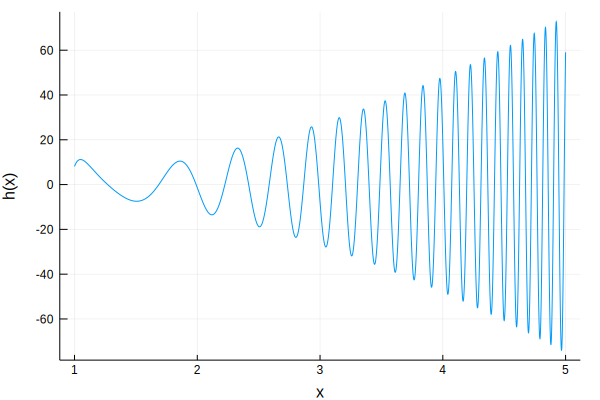

In [53]:
plot(x,y,xlabel="x", ylabel="h(x)", legend=false)

## 6

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable, explotando el uso de los `Dual`. 

- Obtengan, usando su función para el método de Newton, las raices del polinomio de Wilkinson 

$$
W_{6}(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6),
$$ 

usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

In [41]:
function Raíz(f,Xo,iteraciones)
    for i in 1:iteraciones
        Xo = Xo - f(dual(Xo)).x/f(dual(Xo)).x´
    end
    return Xo
end

Raíz (generic function with 1 method)

In [42]:
#Raíces para el polinomio de Wilkinson
r1 = Raíz(x->(x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6), 2.2, 5)
r2 = Raíz(x->(x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6), 2.45, 10)
println("Polinomio de Wilkinson f(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)")
println("Raíz(2.2) = ", r1)
println("Raíz(2.45) = ", r2)

Polinomio de Wilkinson f(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)
Raíz(2.2) = 2.0
Raíz(2.45) = 6.0


In [43]:
#Raíces para xsin(2x)
r = Raíz(x->x*sin(2*x), 0.7, 100)
println("g(x)=xsin(2x)")
println("Raíz(0.7) = ", r)

g(x)=xsin(2x)
Raíz(0.7) = 2.11254479017457e-31


## 7

Argumenten qué podrían hacer para extender la idea de los `Dual` y calcular derivadas aún más altas. Como caso concreto, piensen en querer obtener la derivada 18 de funciones como las que hemos usado arriba

Para extender la utilidad de los números duales a derivadas de segundo orden, se tienen que definir nuevos elementos $\epsilon_2$ y $\epsilon_1\epsilon_2$ no reales, tales que:
$$\epsilon_1\neq\epsilon_2\neq\epsilon_1\epsilon_2\neq0$$ y 
$$\epsilon_1^2=\epsilon_2^2=(\epsilon_1\epsilon_2)^2=0$$
, tales que representan las derivadas de mayores órdenes.


Entonces:

Sea $a = a_0 + a_1\epsilon_1 + a_2\epsilon_2 + 0 \epsilon_1\epsilon_2$

donde $a_1$ y $a_2$ son las derivadas de la variable $a_0$ (se toman inicialmente como $a_1=a_2=1$).

Tendremos luego que una función $f(x)$ evaluada en $x=a$ es:

$$f(a)=f(a_0) + f'(a_0)a_1\epsilon_1 + f'(a_0)a_2\epsilon_2 + f''(a_0)a_1a_2\epsilon_1\epsilon_2$$

de donde, la primera derivada coresponde a la parte no real $\epsilon_1$ o la parte $\epsilon_2$ indistintamente, y la segunda derivada corresponde a la parte $\epsilon_1\epsilon_2$

Para derivadas de mayor orden, digamos orden $18$, se toman en cuenta más partes no reales $\epsilon_3,...,\epsilon_{18}$ distintas todas

y todos los productos posibles de éstos campos:

$\epsilon_1\epsilon_3, ... , \epsilon_1\epsilon_{18}, \epsilon_1\epsilon_2\epsilon_3, ... , ... , \epsilon_1\epsilon_2\cdot\cdot\cdot\epsilon_{18}$

tomando en cuenta que $\epsilon_i^2=0$ para todo $i=1,2,...,18$

al evaluar funciones sobre un $a = a_0 + a_1\epsilon_1 + a_2\epsilon_2 + ... + a_{18}\epsilon_{18} + 0\epsilon_1\epsilon_2 + ... + 0\epsilon_1\epsilon_2\cdot\cdot\cdot\epsilon_{18}$

se tendrá que la primera derivada de $f(a_0)$ cooresponde al coeficiente de cualquier parte no real $\epsilon_i$.

La segunda derivada, corresponde al coeficiente de cualquier parte no real $\epsilon_{i_1}\epsilon_{i_2}$, con $i_1\neq i_2$

La tercera derivada, al coeficiente de cualquier parte no real $\epsilon_{i_1}\epsilon_{i_2}\epsilon_{i_3}$, $i_1\neq i_2 \neq i_3$

y así sucesivamente. La derivada de orden 18 corresponde al coeficiente de la parte no real $\epsilon_1\epsilon_2\cdot\cdot\cdot\epsilon_{17}\epsilon_{18}$